## Python 3.10.11

In [73]:
!pip install --default-timeout=1000 tensorflow==2.8.0 tensorflow-gpu==2.8.0 streamlit matplotlib numpy pandas

In [74]:
!pip install protobuf==3.20.0

In [75]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
altair                       5.3.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
blinker                      1.8.1
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
gitdb                        4.0.11
GitPython                    3.1.43
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [77]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [78]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [80]:
img_width = 180
img_height = 180

In [81]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [82]:
data_cat = data_train.class_names

In [83]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [84]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 351 files belonging to 36 classes.


In [85]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 359 files belonging to 36 classes.


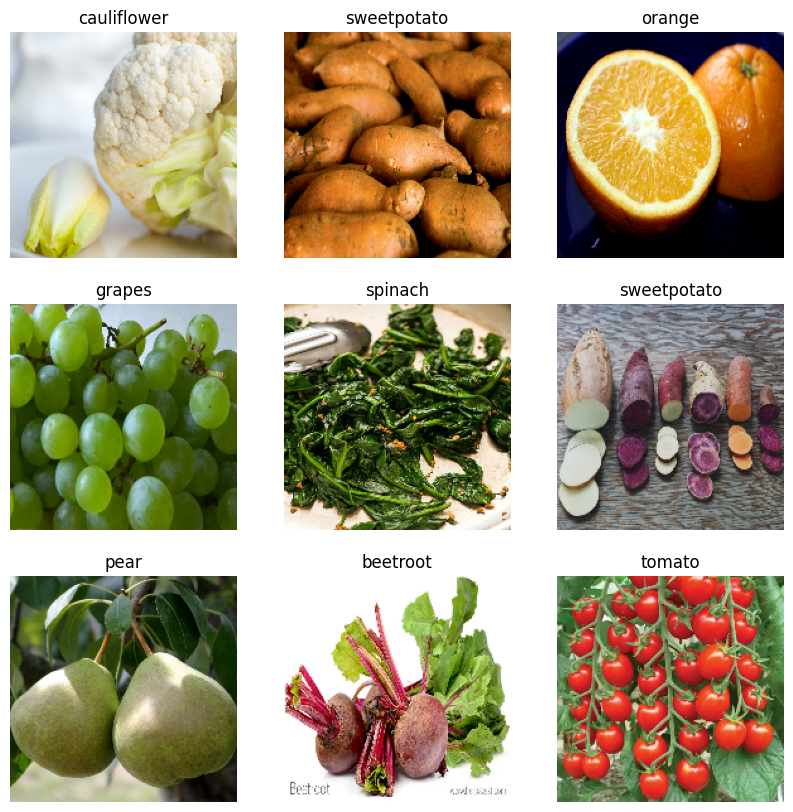

In [86]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [87]:
from tensorflow.keras.models import Sequential

In [88]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [89]:
for images, _ in data_train.take(1):
    model(images)

In [90]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (32, 90, 90, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (32, 90, 90, 32)          4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (32, 45, 45, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (32, 45, 45, 64)         

In [93]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


98/98 [==============================] - 17s 159ms/step - loss: 3.4819 - accuracy: 0.0889 - val_loss: 2.5544 - val_accuracy: 0.3219
Epoch 2/25
98/98 [==============================] - 17s 157ms/step - loss: 2.4719 - accuracy: 0.2921 - val_loss: 1.4271 - val_accuracy: 0.6239
Epoch 3/25
98/98 [==============================] - 17s 157ms/step - loss: 1.8670 - accuracy: 0.4661 - val_loss: 0.8686 - val_accuracy: 0.7806
Epoch 4/25
98/98 [==============================] - 16s 156ms/step - loss: 1.2190 - accuracy: 0.6507 - val_loss: 0.5734 - val_accuracy: 0.8718
Epoch 5/25
98/98 [==============================] - 16s 157ms/step - loss: 0.7460 - accuracy: 0.7881 - val_loss: 0.4368 - val_accuracy: 0.9088
Epoch 6/25
98/98 [==============================] - 17s 157ms/step - loss: 0.4523 - accuracy: 0.8822 - val_loss: 0.3917 - val_accuracy: 0.9402
Epoch 7/25
98/98 [==============================] - 17s 158ms/step - loss: 0.2899 - accuracy: 0.9271 - val_loss: 0.3536 - val_accuracy: 0.9487
Epoch 8/25

Text(0.5, 1.0, 'Loss')

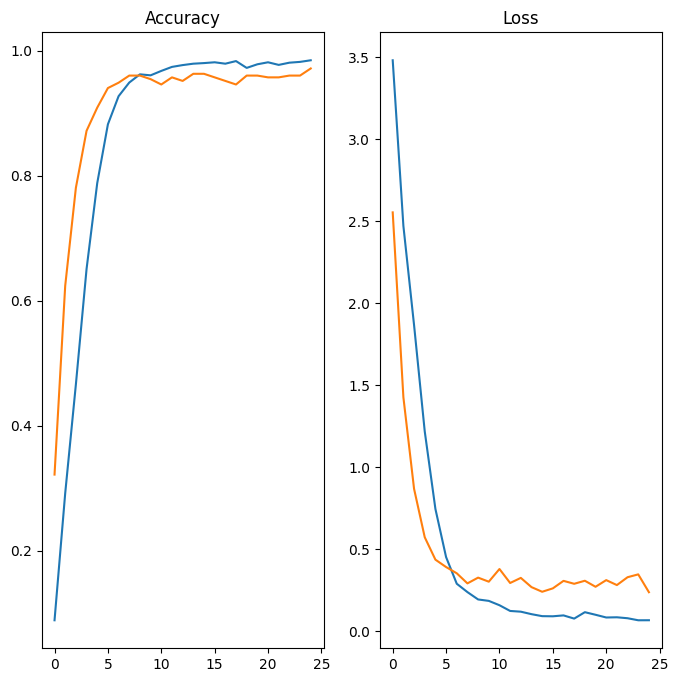

In [94]:
epoch_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history["accuracy"], label="Training Accuracy")
plt.plot(epoch_range, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")


In [116]:
image = "paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr,0)

In [117]:
predict = model.predict(img_batch)

In [118]:
score = tf.nn.softmax(predict)

In [119]:
print(
    "vegetable/fruit in image is {} with accuracy of {:.2f}%".format(
        data_cat[np.argmax(score)], np.max(score) * 100
    )
)

vegetable/fruit in image is paprika with accuracy of 100.00%


In [120]:
model.save("Image_Classification.keras")